### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Rectangle
from matplotlib import pyplot

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import det_curve

from mlxtend.evaluate import accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from os import path
import pickle

import warnings
warnings.filterwarnings('ignore')

### Load Data & Preperation

In [2]:
df = pd.read_csv(r'C:/Users/a0875458/Documents/My Data/IDP/Masters/Sem 6 - 09 - 7333 - Quantifying The World/Week 14/final_project.csv')

In [3]:
df=df.dropna()
df.isnull().sum().sum()

0

In [4]:
# List the total number of rows and columns in the dataframe

print("Total number of rows in the dataframe: " + str(df.shape[0]))
print("Total number of columns in the dataframe: " + str(df.shape[1]))

Total number of rows in the dataframe: 158392
Total number of columns in the dataframe: 51


In [5]:
# Displaying the data types of each column/attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
x0     158392 non-null float64
x1     158392 non-null float64
x2     158392 non-null float64
x3     158392 non-null float64
x4     158392 non-null float64
x5     158392 non-null float64
x6     158392 non-null float64
x7     158392 non-null float64
x8     158392 non-null float64
x9     158392 non-null float64
x10    158392 non-null float64
x11    158392 non-null float64
x12    158392 non-null float64
x13    158392 non-null float64
x14    158392 non-null float64
x15    158392 non-null float64
x16    158392 non-null float64
x17    158392 non-null float64
x18    158392 non-null float64
x19    158392 non-null float64
x20    158392 non-null float64
x21    158392 non-null float64
x22    158392 non-null float64
x23    158392 non-null float64
x24    158392 non-null object
x25    158392 non-null float64
x26    158392 non-null float64
x27    158392 non-null float64
x28    158392 non-null

In [6]:
# Display x24 class types and count
df.groupby('x24').size()

x24
america      4418
asia       137596
euorpe      16378
dtype: int64

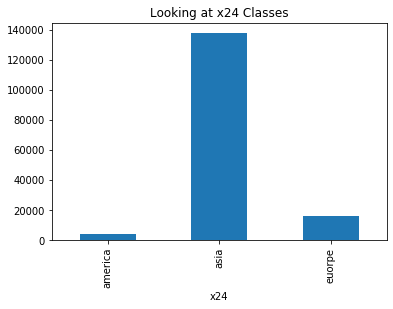

In [7]:
df_x24 = df.groupby(by=['x24'])
df_x24_count = df_x24['x24'].count()
df_x24_count.plot.bar(title= 'Looking at x24 Classes')

In [8]:
# Display x29 class types and count
df.groupby('x29').size()

x29
Apr         6699
Aug        29115
Dev           23
Feb          139
January        9
July       45122
Jun        40900
Mar         1221
May        21708
Nov          331
Oct         2385
sept.      10740
dtype: int64

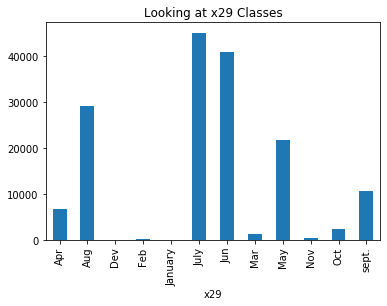

In [9]:
df_x29 = df.groupby(by=['x29'])
df_x29_count = df_x29['x29'].count()
df_x29_count.plot.bar(title= 'Looking at x29 Classes')

In [10]:
# Display x30 class types and count
df.groupby('x30').size()

x30
friday          556
monday          484
thurday       29164
tuesday       27690
wednesday    100498
dtype: int64

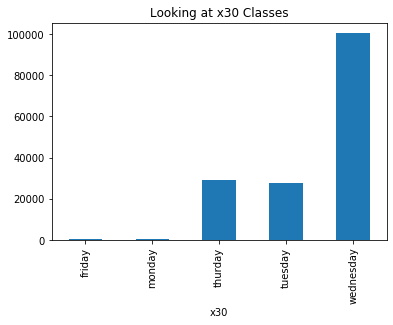

In [11]:
df_x30 = df.groupby(by=['x30'])
df_x30_count = df_x30['x30'].count()
df_x30_count.plot.bar(title= 'Looking at x30 Classes')

In [12]:
# Display x32 class types and count
df.groupby('x32').size()

x32
-0.0%     30224
-0.01%    33771
-0.02%     9812
-0.03%     1709
-0.04%      136
-0.05%        6
0.0%      33556
0.01%     40367
0.02%      7911
0.03%       845
0.04%        54
0.05%         1
dtype: int64

In [13]:
df['x32'] = df['x32'].astype(str)
df['x32'] = df['x32'].str.replace('%', '')
df['x32'] = df['x32'].astype(float)

In [14]:
df['x37'].apply(type).value_counts()

<class 'str'>    158392
Name: x37, dtype: int64

In [15]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)
df['x37'] = df['x37'].apply(clean_currency).astype('float')
df['x37'].apply(type).value_counts()

<class 'float'>    158392
Name: x37, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
x0     158392 non-null float64
x1     158392 non-null float64
x2     158392 non-null float64
x3     158392 non-null float64
x4     158392 non-null float64
x5     158392 non-null float64
x6     158392 non-null float64
x7     158392 non-null float64
x8     158392 non-null float64
x9     158392 non-null float64
x10    158392 non-null float64
x11    158392 non-null float64
x12    158392 non-null float64
x13    158392 non-null float64
x14    158392 non-null float64
x15    158392 non-null float64
x16    158392 non-null float64
x17    158392 non-null float64
x18    158392 non-null float64
x19    158392 non-null float64
x20    158392 non-null float64
x21    158392 non-null float64
x22    158392 non-null float64
x23    158392 non-null float64
x24    158392 non-null object
x25    158392 non-null float64
x26    158392 non-null float64
x27    158392 non-null float64
x28    158392 non-null

In [17]:
# Display y class types and count
df.groupby('y').size()

y
0    94846
1    63546
dtype: int64

In [18]:
# perform one-hot encoding of the categorical data "x24"
df_onehot_x24 = pd.get_dummies(df['x24'],prefix='x24_area')
df_onehot_x29 = pd.get_dummies(df['x29'],prefix='x29_month')
df_onehot_x30 = pd.get_dummies(df['x30'],prefix='x30_day')
df = pd.concat((df,df_onehot_x24,df_onehot_x29,df_onehot_x30),axis=1) # add back into the dataframe

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 71 columns):
x0                   158392 non-null float64
x1                   158392 non-null float64
x2                   158392 non-null float64
x3                   158392 non-null float64
x4                   158392 non-null float64
x5                   158392 non-null float64
x6                   158392 non-null float64
x7                   158392 non-null float64
x8                   158392 non-null float64
x9                   158392 non-null float64
x10                  158392 non-null float64
x11                  158392 non-null float64
x12                  158392 non-null float64
x13                  158392 non-null float64
x14                  158392 non-null float64
x15                  158392 non-null float64
x16                  158392 non-null float64
x17                  158392 non-null float64
x18                  158392 non-null float64
x19                  158392 non-nu

In [20]:
columnsToDrop = ['x24','x29','x30']
    
for col in columnsToDrop:
    if col in df:    
        df.drop([col], axis = 1,inplace = True, errors = 'ignore')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 68 columns):
x0                   158392 non-null float64
x1                   158392 non-null float64
x2                   158392 non-null float64
x3                   158392 non-null float64
x4                   158392 non-null float64
x5                   158392 non-null float64
x6                   158392 non-null float64
x7                   158392 non-null float64
x8                   158392 non-null float64
x9                   158392 non-null float64
x10                  158392 non-null float64
x11                  158392 non-null float64
x12                  158392 non-null float64
x13                  158392 non-null float64
x14                  158392 non-null float64
x15                  158392 non-null float64
x16                  158392 non-null float64
x17                  158392 non-null float64
x18                  158392 non-null float64
x19                  158392 non-nu

### Build Single Model

In [22]:
X = df.drop(columns = 'y')
y = df['y']

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 67 columns):
x0                   158392 non-null float64
x1                   158392 non-null float64
x2                   158392 non-null float64
x3                   158392 non-null float64
x4                   158392 non-null float64
x5                   158392 non-null float64
x6                   158392 non-null float64
x7                   158392 non-null float64
x8                   158392 non-null float64
x9                   158392 non-null float64
x10                  158392 non-null float64
x11                  158392 non-null float64
x12                  158392 non-null float64
x13                  158392 non-null float64
x14                  158392 non-null float64
x15                  158392 non-null float64
x16                  158392 non-null float64
x17                  158392 non-null float64
x18                  158392 non-null float64
x19                  158392 non-nu

In [24]:
test_proportion = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_proportion, stratify=y,random_state=1999)

In [25]:
# %%time

# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# np.random.seed(1999)

# knn = KNeighborsClassifier()

# params_knn = {'n_neighbors': np.arange(10,14,2)}

# knn_gs = GridSearchCV(knn, params_knn, cv=5)

# knn_gs.fit(X_train, y_train)

In [26]:
# knn_best = knn_gs.best_estimator_

# print(knn_gs.best_params_)

In [27]:
# if(path.exists("model_knn_save.pickle")):
#     model_knn = pickle.load(open("model_knn_save.pickle", "rb")) 
#     print(model_knn)
# else:
#     knn = KNeighborsClassifier(n_neighbors=12)
#     model_knn = knn.fit(X_train, y_train)
#     pickle.dump(model_knn, open( "model_knn_save.pickle", "wb" ))
#     print(model_knn)


In [28]:
knn = KNeighborsClassifier(n_neighbors=12)
model_knn = knn.fit(X_train, y_train)
y_hat = np.zeros(y.shape)
y_hat = model_knn.predict(X_test)
cm = confusion_matrix(y_target=y_test, y_predicted=y_hat)
acc= accuracy_score(y_test, y_hat)

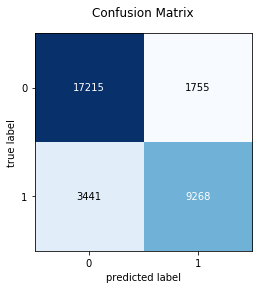

Accuracy:  0.8359796710754759


In [29]:
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Confusion Matrix')
plt.show()
print("Accuracy: ", acc)

In [30]:
cost_matrix = np.array([[0, 10],[500, 0]])

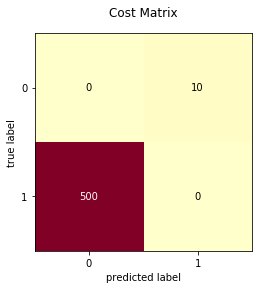

In [31]:
fig, ax = plot_confusion_matrix(conf_mat=cost_matrix,cmap="YlOrRd")
plt.title('Cost Matrix')
plt.show()

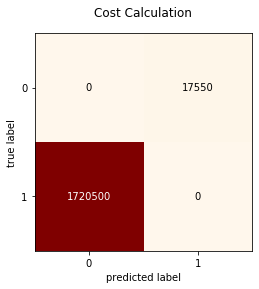

In [32]:
cost_calc = np.multiply(cm, cost_matrix)
fig, ax = plot_confusion_matrix(conf_mat=cost_calc,cmap="OrRd")
plt.title('Cost Calculation')
plt.show()

In [33]:
class_cost = np.sum(cost_calc)

In [34]:
y_score = model_knn.predict_proba(X_test)

KNN: f1=0.781 auc=0.878


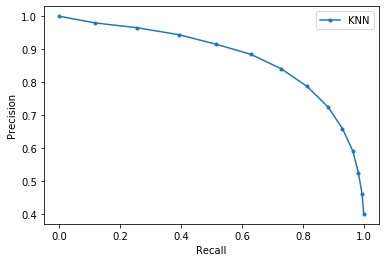

In [35]:
knn_probs = y_score[:, 1]
# predict class values
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y_test, knn_probs)
knn_f1, knn_auc = f1_score(y_test, y_hat), auc(knn_recall, knn_precision)
# summarize scores
print('KNN: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
pyplot.plot(knn_recall, knn_precision, marker='.', label='KNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [36]:
# Function definition to convert probability of high occurance to binary class labels '0' or '1', based on an input thrshold

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [65]:
# Plots Classification Metrics (Accuracy, False Negative Rate, False Positive Rate) and Classification $ Cost impact 
#   vs classification threshold
# Inputs are y_test, y_probability_score_for_high,threshold_interest
# Threshold_interest is probability threshold of interest for most optimal model performance, given trade-offs between 
#   model $cost and classification erros. It is manual entry for visual display in the plot.

def plot_metrics_cost_vs_threshold(y_test_ref,y_prob_high_score,threshold_interest,cost_matrix):
    knn_fpr, knn_fnr, knn_thresholds = det_curve(y_test_ref, y_prob_high_score)
    score = [confusion_matrix(y_target=y_test, y_predicted=to_labels(y_prob_high_score, t))  for t in knn_thresholds]
    cost_list =[]
    acc_list = []

    for nscore in score:
        fp    = nscore[0][1]
        fn    = nscore[1][0]
        tp    = nscore[1][1]
        tn    = nscore[0][0]
        total = nscore.sum()
        acc   = (tp+tn)/total

        cost_score = np.sum(np.multiply(nscore, cost_matrix))

        cost_list.append(cost_score)
        acc_list.append(acc)
        
    xloc, yloc = threshold_interest, -0.1
    fig, ax1 = plt.subplots()

    color = 'k'
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Metrics', color=color)
    ax1.plot(knn_thresholds, knn_fpr, '-.',color= color, label='fpr')
    ax1.plot(knn_thresholds, knn_fnr, '--o',color= color,  label='fnr')
    ax1.plot(knn_thresholds, acc_list,'--o',color= 'g',  label='acc')
    ax1.add_patch(Rectangle((xloc, yloc),0.1, 1.1, facecolor="yellow", alpha = 0.1))
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc=0)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('$ cost', color=color)  # we already handled the x-label with ax1
    ax2.plot(knn_thresholds, cost_list, 's:',color= color, label='cost')
    ax2.tick_params(axis='y', labelcolor=color)

    ax2.legend(loc=0)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    
    print('$ Cost and Classification Error Rates for different classification thresholds:')
    dfs = pd.DataFrame(list(zip(knn_thresholds, cost_list,knn_fnr,knn_fpr,acc_list)),columns =['Threshold', '$Cost', 'FNr','FPr','Acc'])
    print(dfs)
    

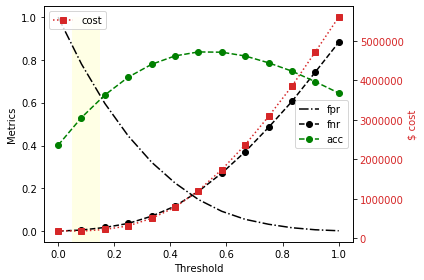

$ Cost and Classification Error Rates for different classification thresholds:
    Threshold    $Cost       FNr       FPr       Acc
0    0.000000   189700  0.000000  1.000000  0.401181
1    0.083333   179600  0.004957  0.780706  0.530509
2    0.166667   221140  0.016996  0.596415  0.636036
3    0.250000   311850  0.035801  0.444649  0.719372
4    0.333333   504040  0.069714  0.321771  0.779349
5    0.416667   783150  0.116532  0.224829  0.818618
6    0.500000  1207480  0.185616  0.147496  0.837211
7    0.583333  1738050  0.270753  0.092514  0.835980
8    0.666667  2366920  0.370840  0.054929  0.818334
9    0.750000  3085570  0.484617  0.031998  0.786420
10   0.833333  3852980  0.605870  0.015709  0.747530
11   0.916667  4724180  0.743253  0.006220  0.698097
12   1.000000  5604810  0.881973  0.001634  0.645191


In [66]:
plot_metrics_cost_vs_threshold(y_test, knn_probs,0.05,cost_matrix)